In [140]:
import numpy as np
from matplotlib import pyplot as plt

In [141]:
#function that makes two plots (and saves them in the current directory):
#       - membrane potential vs time + input current vs time
#       - phase portait i.e. recovery variable vs membrane potential
#the functionn takes in input: name of the feature, timestep, array of time instants, the 5 parameters of the Izhikevich model, and the initial values of u and w 

def neuronplot(feature,dt,t,I,a,b,c,d,u0,w0):

    fig, (ax0, ax1) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
    fig.suptitle(feature)
    ax1.plot(t,I,)
    ax1.set(xlabel='t [ms]', ylabel='I [pA]')

    u=np.zeros(len(t))
    w=np.zeros(len(t))

    #initial values
    u[0]= u0 
    w[0]= w0

    #numerical integration using leapfrog method
    for j in range (0,len(t)-1):

        u[j+1]= u[j]+dt*(0.04*(u[j])**2+5*u[j]+140-w[j]+I[j])
        w[j+1]= w[j]+dt*a*(b*u[j+1]-w[j])
        
        if u[j] > 30:
            u[j] = 30
            u[j+1] = c
            w[j+1] = w[j] + d

    
    ax0.plot(t,u)
    ax0.set(ylabel='Membrane Potential, u [mv]')
    plt.savefig(feature+'- Membrane Potential',format='pdf')

    #Phase portrait
    plt.figure()
    plt.title(feature)
    plt.plot(u,w)
    plt.xlabel('Membrane Potential, u [mv]')
    plt.ylabel('Recovery Variable, w [a.u.]')
    plt.savefig(feature+'- Phase Plot',format='pdf')

    plt.show()

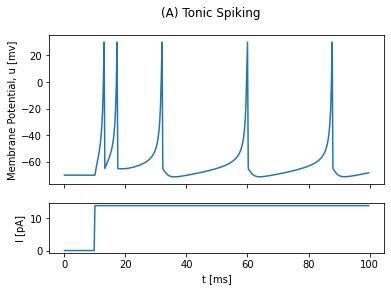

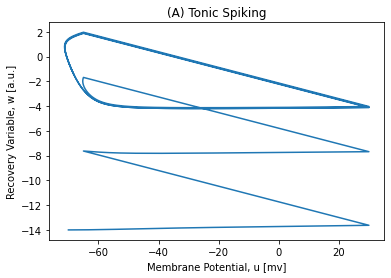

In [142]:
#(A) Tonic Spiking
feature = '(A) Tonic Spiking'
dt=0.25 #timestep [ms]
tmax=100 #ms

#input current
t_input=int(tmax/10)
I_excitatory = 14
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.2
c=-65
d=6
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

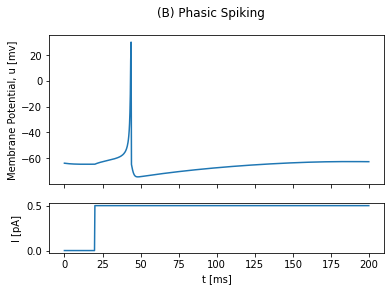

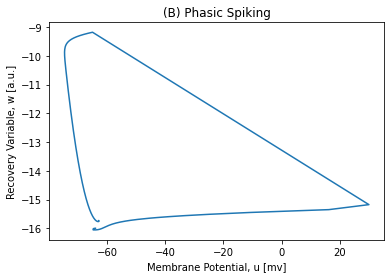

In [143]:
#(B) Phasic Spiking
feature = '(B) Phasic Spiking'
dt=0.25 #timestep [ms]
tmax=200 #ms

#input current
t_input=20
I_excitatory = 0.5
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.25
c=-65
d=6
u0 = -64
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

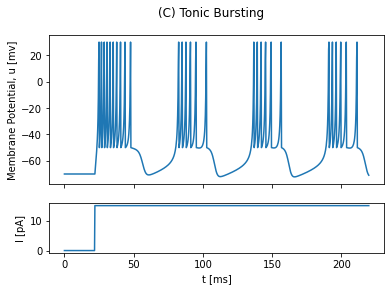

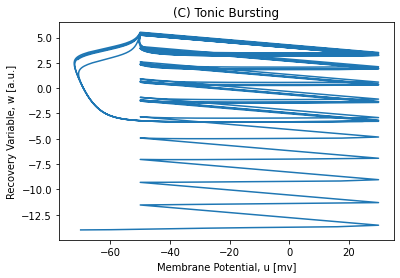

In [144]:
#(C) Tonic Bursting
feature = '(C) Tonic Bursting'
dt=0.25 #timestep [ms]
tmax=220 #ms

#input current
t_input=22
I_excitatory = 15
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.2
c=-50
d=2
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

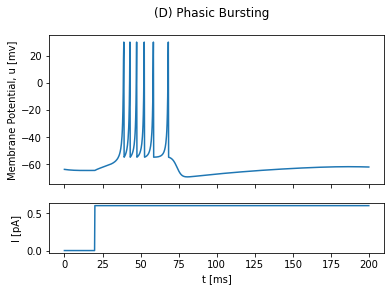

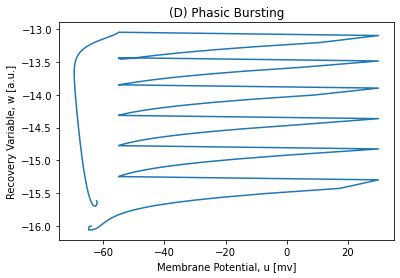

In [145]:
#(D) Phasic Bursting
feature = '(D) Phasic Bursting'
dt=0.2 #timestep [ms]
tmax=200 #ms

#input current
t_input=20
I_excitatory=0.6
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.25
c=-55
d=0.05
u0=-64
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

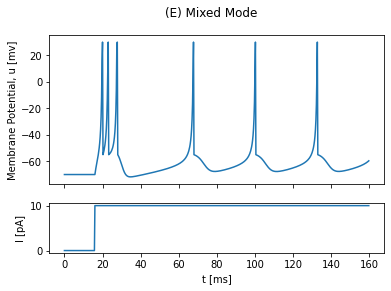

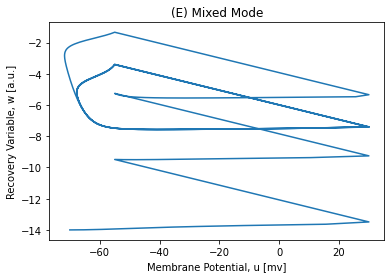

In [146]:
#(E) Mixed Mode
feature = '(E) Mixed Mode'
dt=0.25 #timestep [ms]
tmax=160 #ms

#input current
t_input=int(tmax/10)
I_excitatory=10
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.2
c=-55
d=4
u0=-70
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

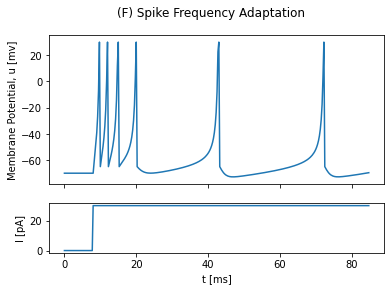

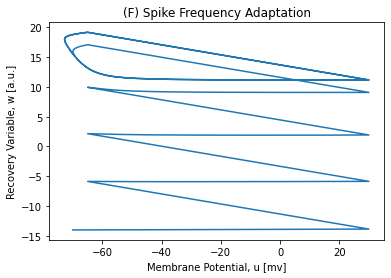

In [147]:
#(F) Spike Frequency Adaptation
feature = '(F) Spike Frequency Adaptation'
dt=0.25 #timestep [ms]
tmax=85 #ms

#input current
t_input=int(tmax/10)
I_excitatory=30
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.01
b=0.2
c=-65
d=8
u0=-70
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

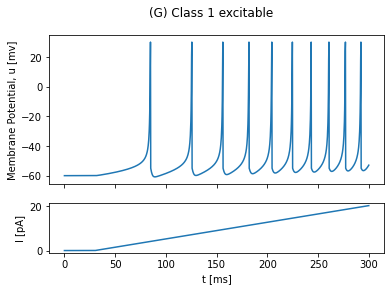

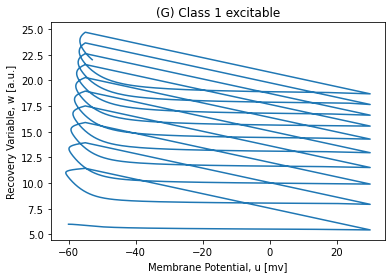

In [148]:
#(G) Class 1 excitable
feature = '(G) Class 1 excitable'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=30
I=np.zeros(len(t))

for j in range(0,len(I)):
    if t[j] > t1:
        I[j] = 0.075*(t[j]-t1)

#initial conditions
a=0.02
b=-0.1
c=-55
d=6
u0=-60
w0=b*u0

#in this case (G) the differential equations are slightly different, so I write again the code instead of using the function "neuronplot" :

fig, (ax0, ax1) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle(feature)
ax1.plot(t,I)
ax1.set(xlabel='t [ms]', ylabel='I [pA]')

u=np.zeros(len(t))
w=np.zeros(len(t))

#initial values
u[0]= u0 
w[0]= w0


for j in range (0,len(t)-1):

    u[j+1]= u[j]+dt*(0.04*(u[j])**2+4.1*u[j]+108-w[j]+I[j])
    w[j+1]= w[j]+dt*a*(b*u[j+1]-w[j])
    
    if u[j] > 30:
        u[j] = 30
        u[j+1] = c
        w[j+1] = w[j] + d


ax0.plot(t,u)
ax0.set(ylabel='Membrane Potential, u [mv]')
plt.savefig(feature+'- Membrane Potential',format='pdf')

plt.figure()
plt.title(feature)
plt.plot(u,w)
plt.xlabel('Membrane Potential, u [mv]')
plt.ylabel('Recovery Variable, w [a.u.]')
plt.savefig(feature+'- Phase Plot',format='pdf')
plt.show()

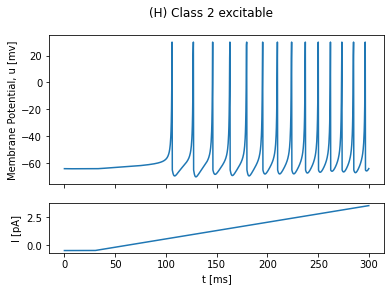

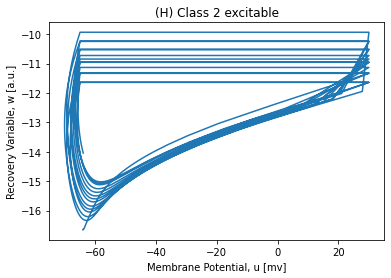

In [149]:
#(H) Class 2 excitable
feature = '(H) Class 2 excitable'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=30

I=np.zeros(len(t))


for j in range(0,len(I)):
    if t[j] > t1:
        I[j] = -0.5+(0.015*(t[j]-t1))
    else:
        I[j] = -0.5


#initial conditions
a=0.2
b=0.26
c=-65
d=0
u0=-64
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

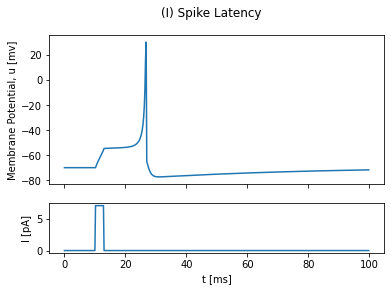

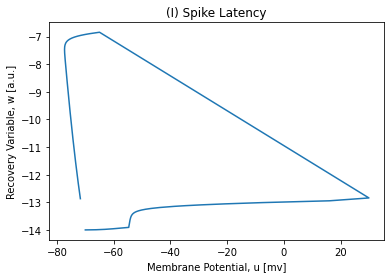

In [150]:
#(I) Spike Latency
feature = '(I) Spike Latency'
dt=0.2 #timestep [ms]
tmax=100 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/10)
I=np.zeros(len(t))
for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 +3:
        I[j] = 7.04
        
#initial conditions
a=0.02
b=0.2
c=-65
d=6
u0=-70
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

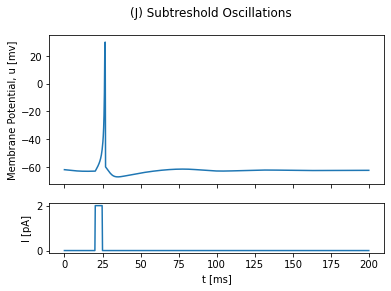

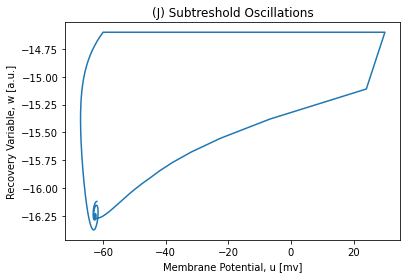

In [151]:
#(J) Subtreshold Oscillations
feature = '(J) Subtreshold Oscillations'
dt=0.25 #timestep [ms]
tmax=200 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/10)
I=np.zeros(len(t))
for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 +5:
        I[j] = 2
        
#initial conditions
a=0.05
b=0.26
c=-60
d=0
u0=-62
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

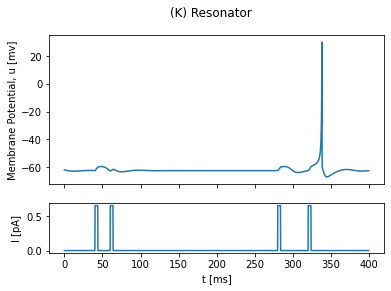

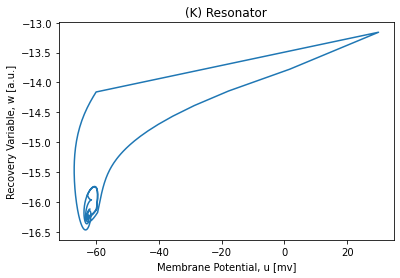

In [152]:
#(K) Resonator
feature = '(K) Resonator'
dt=0.25 #timestep [ms]
tmax=400 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/10)
t2=t1+20
t3=0.7*tmax
t4=t3+40
I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +4) | (t[j] > t2 and t[j] < t2 +4) | (t[j] > t3 and t[j] < t3 +4) | (t[j] > t4 and t[j] < t4 +4)  :
        I[j] = 0.65
        
#initial conditions
a=0.1
b=0.26
c=-60
d=-1
u0=-62
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

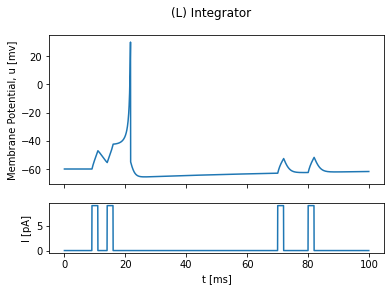

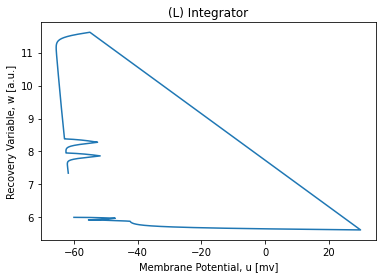

In [153]:
#(L) Integrator
feature = '(L) Integrator'
dt=0.05 #timestep [ms]
tmax=100 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/11)
t2=t1+5
t3=0.7*tmax
t4=t3+10
I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +2) | (t[j] > t2 and t[j] < t2 +2) | (t[j] > t3 and t[j] < t3 +2) | (t[j] > t4 and t[j] < t4 +2)  :
        I[j] = 9
        
#initial conditions
a=0.02
b=-0.1
c=-55
d=6
u0=-60
w0=b*u0

#in this case (L) the differential equations are slightly different, so I write again the code instead of using the function "neuronplot" :

fig, (ax0, ax1) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle(feature)
ax1.plot(t,I)
ax1.set(xlabel='t [ms]', ylabel='I [pA]')

u=np.zeros(len(t))
w=np.zeros(len(t))

#initial values
u[0]= u0 
w[0]= w0


for j in range (0,len(t)-1):

    u[j+1]= u[j]+dt*(0.04*(u[j])**2+4.1*u[j]+108-w[j]+I[j])
    w[j+1]= w[j]+dt*a*(b*u[j+1]-w[j])
    
    if u[j] > 30:
        u[j] = 30
        u[j+1] = c
        w[j+1] = w[j] + d


ax0.plot(t,u)
ax0.set(ylabel='Membrane Potential, u [mv]')
plt.savefig(feature+'- Membrane Potential',format='pdf')


plt.figure()
plt.title(feature)
plt.plot(u,w)
plt.xlabel('Membrane Potential, u [mv]')
plt.ylabel('Recovery Variable, w [a.u.]')
plt.savefig(feature+'- Phase Plot',format='pdf')
plt.show()

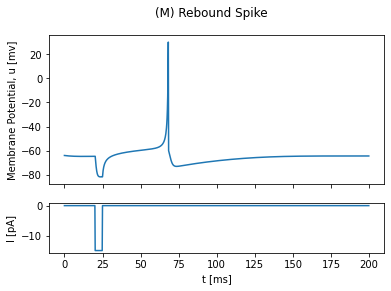

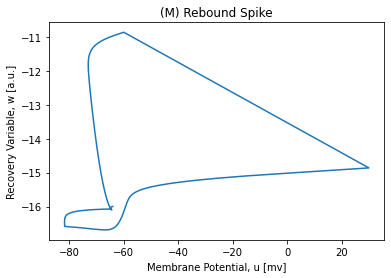

In [154]:
#(M) Rebound Spike
feature = '(M) Rebound Spike'
dt=0.2 #timestep [ms]
tmax=200 #ms
t=np.arange(0,tmax,dt)

#input current
t1=20
I=np.zeros(len(t))

for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 + 5:
        I[j] = -15
        
#initial conditions
a=0.03
b=0.25
c=-60
d=4
u0=-64
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

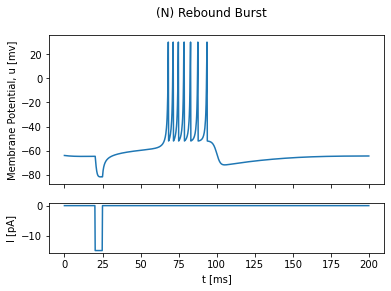

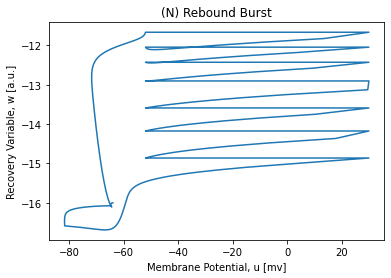

In [155]:
#(N) Rebound Burst
feature = '(N) Rebound Burst'
dt=0.2 #timestep [ms]
tmax=200 #ms
t=np.arange(0,tmax,dt)

#input current
t1=20
I=np.zeros(len(t))

for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 + 5:
        I[j] = -15
        
#initial conditions
a=0.03
b=0.25
c=-52
d=0
u0=-64
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

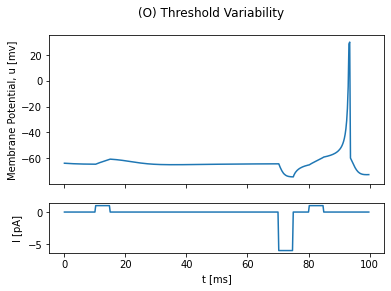

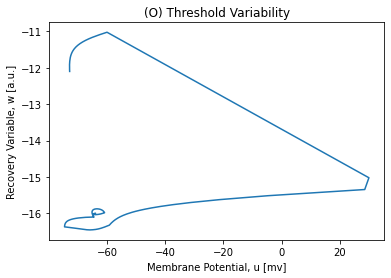

In [156]:
#(O) Threshold Variability
feature = '(O) Threshold Variability'
dt=0.25 #timestep [ms]
tmax=100 #ms
t=np.arange(0,tmax,dt)

#input current
I=np.zeros(len(t))

for j in range(0,len(I)):
    if (t[j] > 10 and t[j] < 15) | (t[j] > 80 and t[j] < 85) :
        I[j] = 1
    elif (t[j] > 70 and t[j] < 75):
        I[j] = -6
        
#initial conditions
a=0.03
b=0.25
c=-60
d=4
u0=-64
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

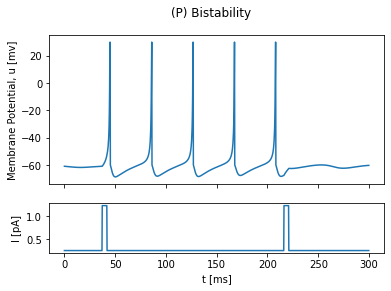

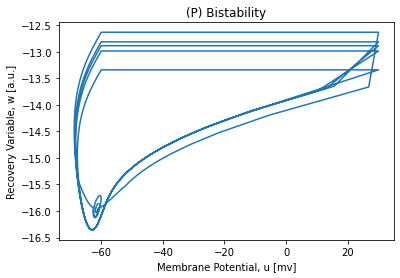

In [157]:
#(P) Bistability
feature = '(P) Bistability'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/8)
t2=216

I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +5) | (t[j] > t2 and t[j] < t2 +5) :
        I[j] = 1.24
    else:
        I[j]=0.24
        
#initial conditions
a=0.1
b=0.26
c=-60
d=0
u0=-61
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

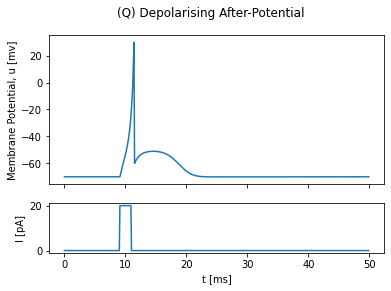

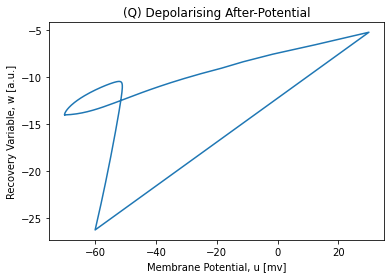

In [158]:
#(Q) Depolarising After-Potential
feature = '(Q) Depolarising After-Potential'
dt=0.1 #timestep [ms]
tmax=50 #ms
t=np.arange(0,tmax,dt)

#input current
t1=10

I=np.zeros(len(t))

for j in range(0,len(I)):
    if abs(t[j]-t1) < 1:
        I[j] = 20
        
#initial conditions
a=1
b=0.2
c=-60
d=-21
u0=-70
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

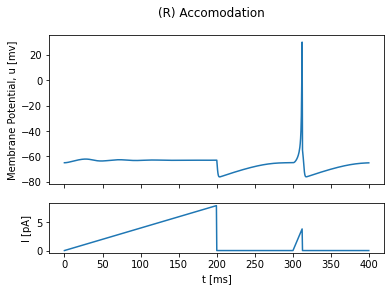

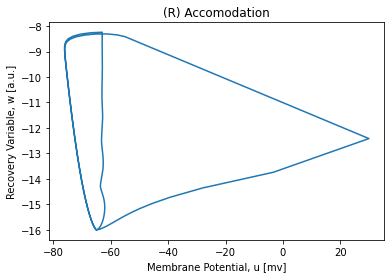

In [159]:
#(R) Accomodation
feature = '(R) Accomodation'
dt=0.5 #timestep [ms]
tmax=400 #ms
t=np.arange(0,tmax,dt)

#input current
t1=30
I=np.zeros(len(t))


for j in range(0,len(I)):
    if t[j] < 200:
        I[j] = t[j]/25
    elif t[j] < 300:
        I[j] = 0
    elif t[j] < 312.5:
        I[j] = (t[j]-300)/12.5*4



#initial conditions
a=0.02
b=1
c=-55
d=4
u0=-65
w0=-16

#in this case (R) the differential equations are slightly different, so I write again the code instead of using the function "neuronplot" :

fig, (ax0, ax1) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle(feature)
ax1.plot(t,I)
ax1.set(xlabel='t [ms]', ylabel='I [pA]')

u=np.zeros(len(t))
w=np.zeros(len(t))

#initial values
u[0]= u0 
w[0]= w0


for j in range (0,len(t)-1):

    u[j+1]= u[j]+dt*(0.04*(u[j])**2+5*u[j]+140-w[j]+I[j])
    w[j+1]= w[j]+dt*a*(b*(u[j+1]+65))
    
    if u[j] > 30:
        u[j] = 30
        u[j+1] = c
        w[j+1] = w[j] + d

ax0.plot(t,u)
ax0.set(ylabel='Membrane Potential, u [mv]')
plt.savefig(feature+'- Membrane Potential',format='pdf')


plt.figure()
plt.title(feature)
plt.plot(u,w)
plt.xlabel('Membrane Potential, u [mv]')
plt.ylabel('Recovery Variable, w [a.u.]')
plt.savefig(feature+'- Phase Plot',format='pdf')
plt.show()

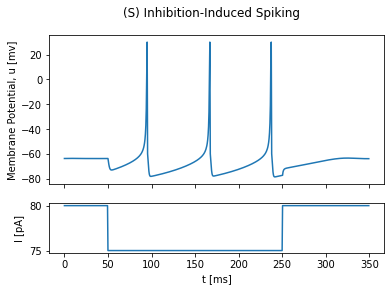

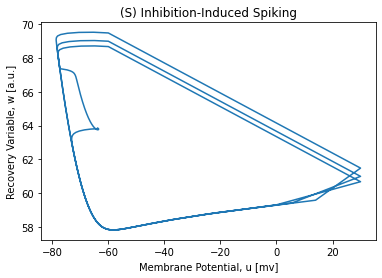

In [160]:
#(S) Inhibition-Induced Spiking
feature = '(S) Inhibition-Induced Spiking'
dt=0.5 #timestep [ms]
tmax=350 #ms
t=np.arange(0,tmax,dt)

#input current

I=np.zeros(len(t))

for j in range(0,len(I)):
    if (t[j] < 50) | (t[j] > 250) :
        I[j] = 80
    else:
        I[j] = 75
        
#initial conditions
a=-0.02
b=-1
c=-60
d=8
u0=-63.8
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

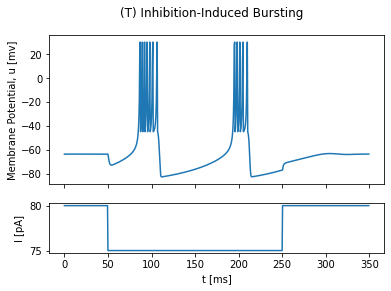

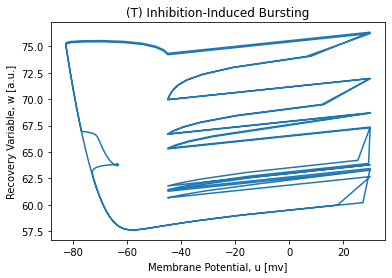

In [161]:
#(T) Inhibition-Induced Bursting
feature = '(T) Inhibition-Induced Bursting'
dt=0.5 #timestep [ms]
tmax=350 #ms
t=np.arange(0,tmax,dt)

#input current

I=np.zeros(len(t))

for j in range(0,len(I)):
    if (t[j] < 50) | (t[j] > 250) :
        I[j] = 80
    else:
        I[j] = 75
        
#initial conditions
a=-0.026
b=-1
c=-45
d=-2
u0=-63.8
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# Bonus Track Assignment: In-depth analysis of particular cases
### Focus (at least) on the following neuro-computational features: Resonator, Integrator, Bistability.

For each of the considered features, provide a data vector/array representing the input that
led to the desired observed neuronal behavior and another vector/array that corresponds to
a case in which the desired neuronal behavior does not emerge.
Moreover, for each of the considered features, also write a brief comment in which you
explain why the neuronal behavior is not emerging in the second case.

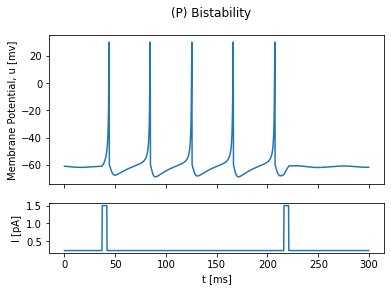

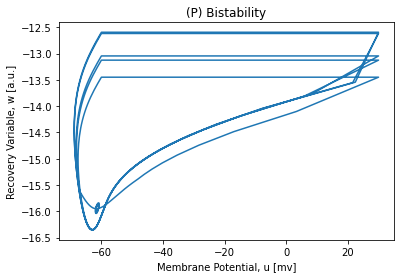

In [162]:
###
#(P) Bistability
feature = '(P) Bistability'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/8)
t2=216

I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +5) | (t[j] > t2 and t[j] < t2 +5) :
        I[j] = 1.5
    else:
        I[j]=0.24
        
#initial conditions
a=0.1
b=0.26
c=-60
d=0
u0=-61
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)